<a href="https://colab.research.google.com/github/adcaceres69/Ensamble_Boosting/blob/main/DATATHON_Clase55_mio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análisis y Modelado de datos para Predicción de precios de VIVIENDAS
### Data Science Academy - CODER - Datathon clase 55

In [ ]:
# librerias varias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

### 1. Carga y preprocesamiento de datos:

In [ ]:
# Cargamos los datos
df_features = pd.read_csv('/train.csv')
# muy adelantado
test_data = pd.read_csv('/test.csv')

In [ ]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df_features.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df_features.shape

(1460, 81)

In [ ]:
## cantidad de filas que mostramos - Esta funcion permite mostrar todas las filas de un dataframe ##
pd.set_option('display.max_rows', None)

In [ ]:
# creo una serie con la representatividad porcentual de las columnas de valores nulos
# ordenado de mayor a menor
# se borrnan los valores nulos

df_features.isnull().sum().sort_values(ascending=False)
serie=(df_features.isnull().sum()/df_features.shape[0])*100
serie=serie.sort_values(ascending=False)
serie=serie[serie>0]
#serie=serie.drop(serie[serie==0].index)
serie

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

<Axes: >

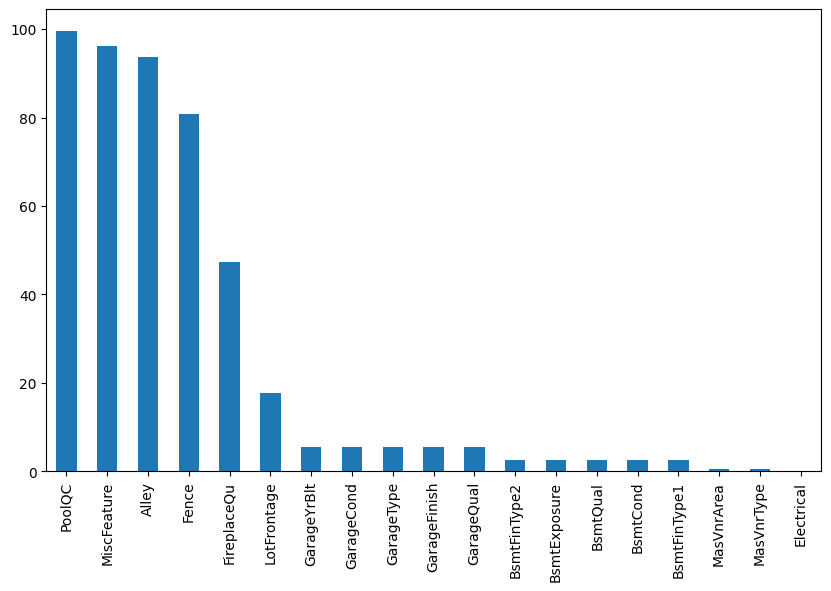

In [ ]:
# graficamos la representatividad porcentual de los nulos
plt.figure(figsize=(10,6))
serie.plot(kind='bar')

### Analizando faltantes

<Axes: >

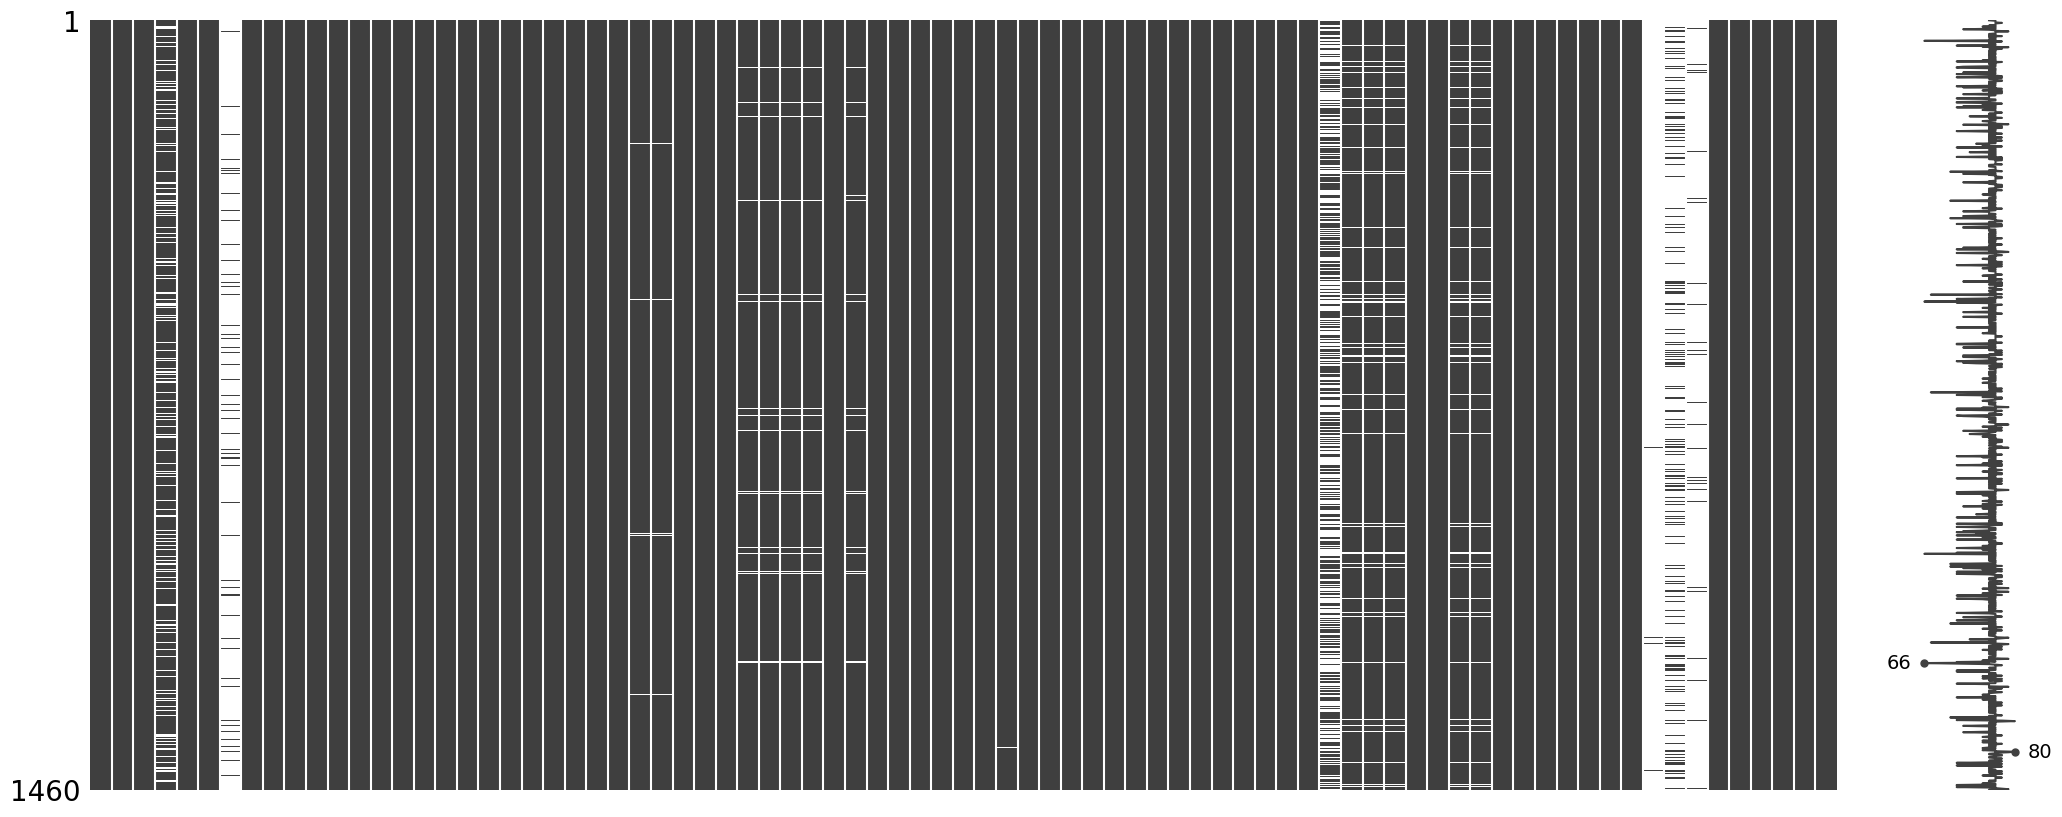

In [ ]:
import missingno as msno
msno.matrix(df_features)

<Axes: >

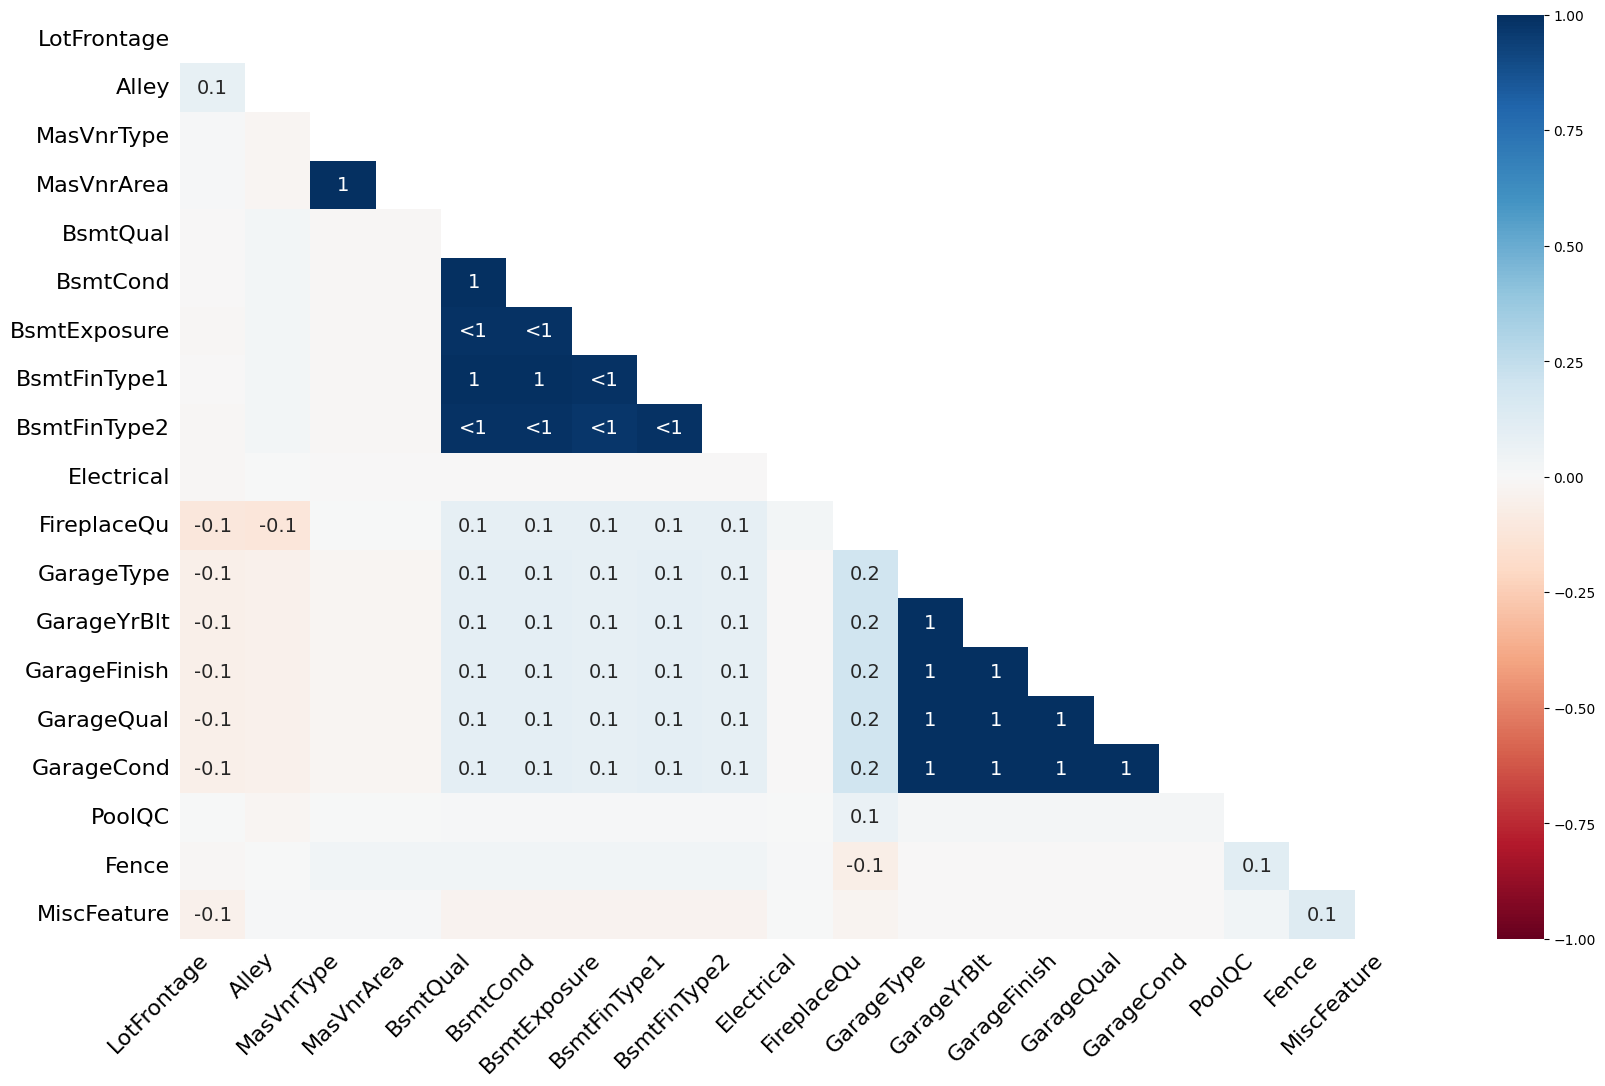

In [ ]:
msno.heatmap(df_features)

* El mapa de calor generado por esta función muestra un rango de colores que representan la correlación entre la ausencia de datos en diferentes columnas. Una correlación positiva (colores más cálidos, tendiendo a 1) indica que cuando una columna tiene datos faltantes, es más probable que otra columna también los tenga. Por el contrario, una correlación negativa (colores más fríos, tendiendo a -1) sugiere que la presencia de datos en una columna está asociada con la ausencia de datos en otra.

Este tipo de visualización es útil cuando estás tratando de entender la estructura de los datos faltantes en tu conjunto de datos. Puede ayudarte a decidir cómo manejar los datos faltantes, ya sea mediante la eliminación de ciertas filas o columnas, o imputando valores de alguna manera. Si dos columnas tienen una alta correlación de datos faltantes, puede que haya una razón subyacente para ello que requiere atención.

<Axes: >

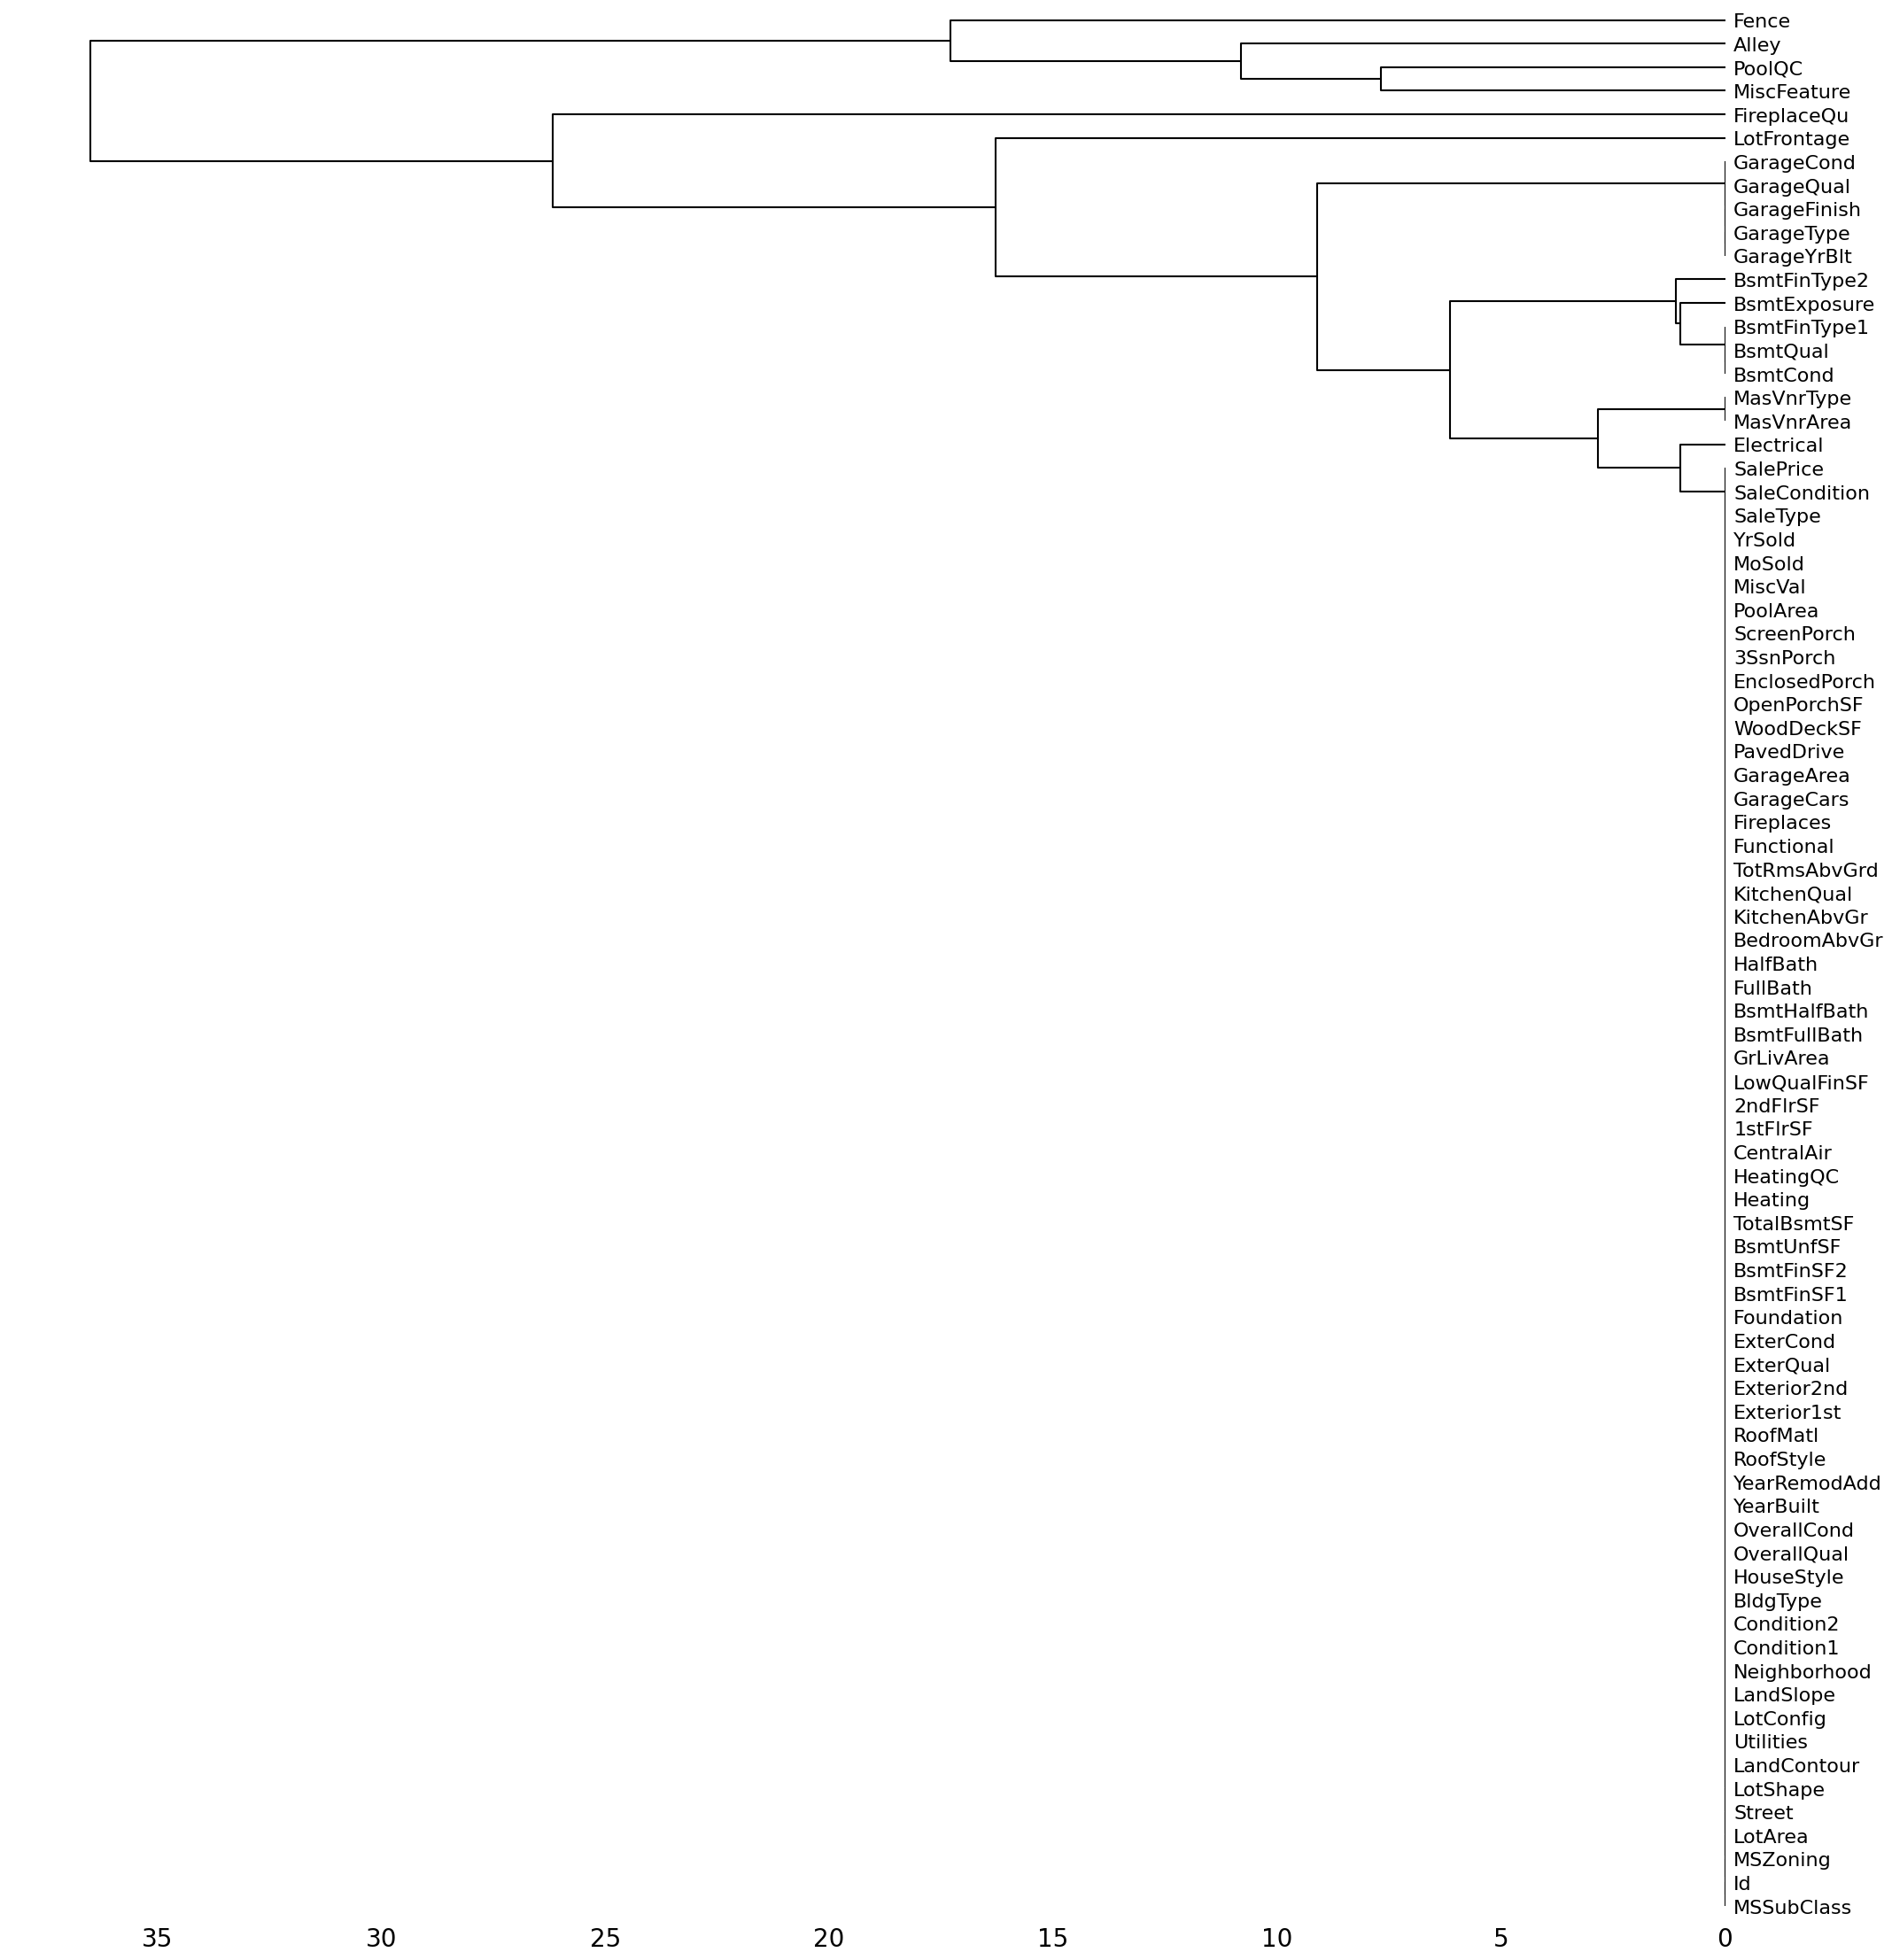

In [ ]:
msno.dendrogram(df_features)

* El dendrograma resultante es un árbol como diagrama en el que las ramas que se juntan cerca de la raíz del árbol sugieren grupos de columnas con patrones de datos faltantes muy similares, es decir, *si dos columnas se unen en la base del dendrograma, probablemente tienen pocos o ningún dato faltante en común*. Por otro lado, columnas que solo se unen cerca de las hojas del dendrograma tienen muchos datos faltantes en común.

In [ ]:
df_features.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
df_features.PoolQC.value_counts() # Decision: borrar

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [ ]:
df_features.MiscFeature.value_counts() # Decision: borrar

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [ ]:
df_features.Alley.value_counts() # Decision: borrar

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [ ]:
df_features.Fence.value_counts() # Decision: borrar

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [ ]:
df_features.FireplaceQu.value_counts() # Decision: Con este se podria hacer otra tecnica en vez de borrar la columna

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [ ]:
df_features.LotFrontage.isnull().sum() # Decision: Reemplazar con alguna tecnica de interpolacion

259

In [ ]:
df_features.GarageFinish.value_counts() # Decision: Alguna tecnica de reemplazo

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [ ]:
df_features.GarageQual.value_counts() # Decision: Alguna tecnica de reemplazo

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [ ]:
df_features.GarageCond.value_counts() # Decision: Reemplazar con alguna tecnica

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [ ]:
df_features.GarageType.value_counts() # Decision: Reemplazar con alguna tecnica

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [ ]:
df_features.BsmtExposure.value_counts() # Decision: Tecnica reemplazro

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [ ]:
df_features.GarageYrBlt.isnull().sum() # Decision: Reemplazar con alguna tecnica de interpolacion

81

In [ ]:
df_features.BsmtFinType2.value_counts() # Decision: Tecnica reemplazro

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [ ]:
df_features.BsmtFinType1.value_counts() # Decision: Tecnica reemplazro

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [ ]:
df_features.BsmtCond.value_counts()# Decision: reemplzar moda

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [ ]:
df_features.BsmtQual.value_counts()# Decision: reemplzar moda

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [ ]:
df_features.MasVnrArea.isnull().sum()

8

In [ ]:
df_features.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [ ]:
df_features.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

Agrupamos las columnas por decision tomada para eliminar o reemplazar los datos faltantes

In [ ]:
df_features.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
df_features.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
col_borrar = ['PoolQC','MiscFeature','Alley','Fence','Id'] #borrar
col_inter = ['LotFrontage','GarageYrBlt','MasVnrArea'] #interpolar

col_cat = ['FireplaceQu', 'GarageType','GarageQual', 'GarageFinish','GarageCond',
           'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','BsmtQual','BsmtCond',
           'MasVnrType','Electrical'] #categoricas

#df_features[col_cat] = df_features[col_cat].fillna(df_features[col_cat].mode())
# esto se deberia reemplazar por:
#for column in col_cat:
    # Obtenemos la moda de la columna actual
#    mode_value = df_features[column].mode()[0]
    # Rellenamos los valores faltantes con la moda
#    df_features[column] = df_features[column].fillna(mode_value)

In [ ]:
#borrar columnas
df_features.drop(col_borrar,axis=1,inplace=True)

In [ ]:
# interpolar columnas
for i in col_inter:
  df_features[i] = df_features[i].fillna(df_features[i].median())

In [ ]:
# categoricas
for i in col_cat: # Reemplazar los vacios por Desconocido
  df_features[i] = df_features[i].fillna('Desconocido')

In [ ]:
df_features.isnull().sum()

In [ ]:
df_features.SaleCondition.value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

### 2. EDA

In [ ]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

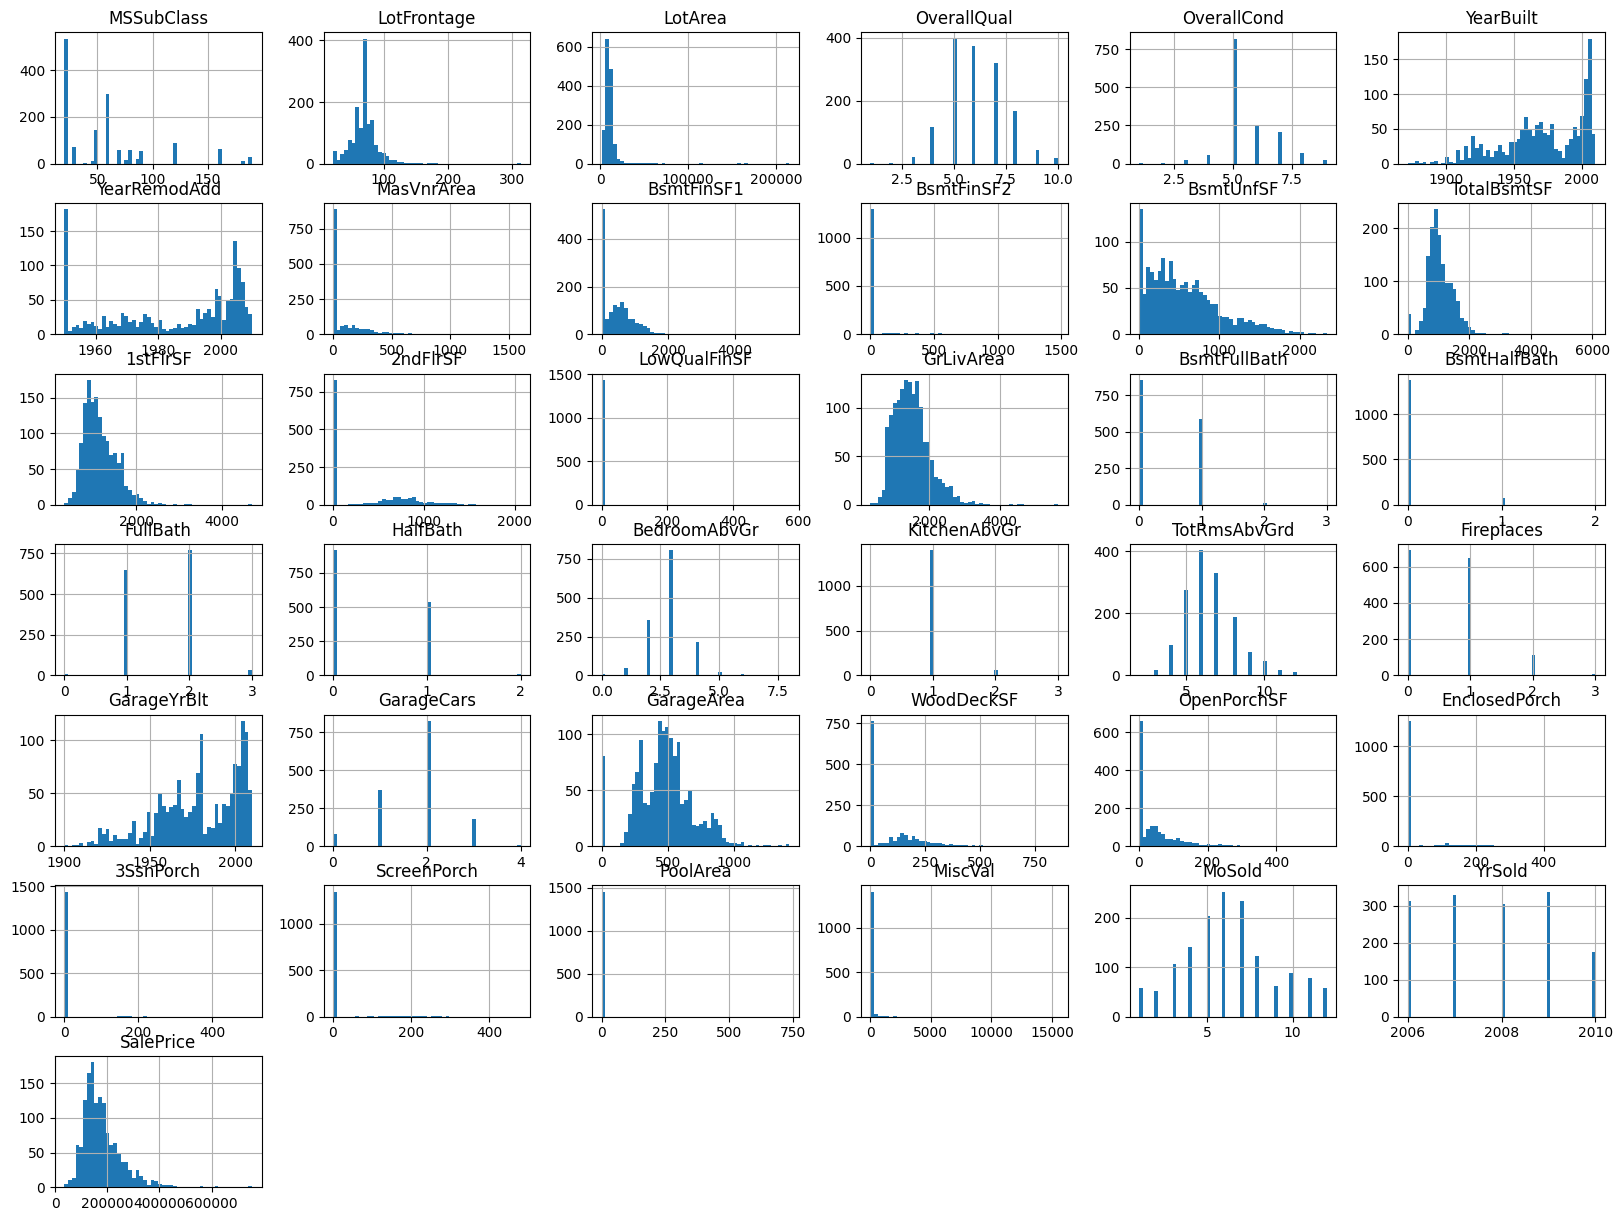

In [ ]:
df_features.hist(bins=50, figsize=(20,15))

<ipython-input-169-dd80e7d29693>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  num_columns = df_features.corr().shape[1]
<ipython-input-169-dd80e7d29693>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  num_rows = df_features.corr().shape[0]
<ipython-input-169-dd80e7d29693>:21: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_features.corr(), annot=True, cmap='RdYlGn') #,numeric_only=True)


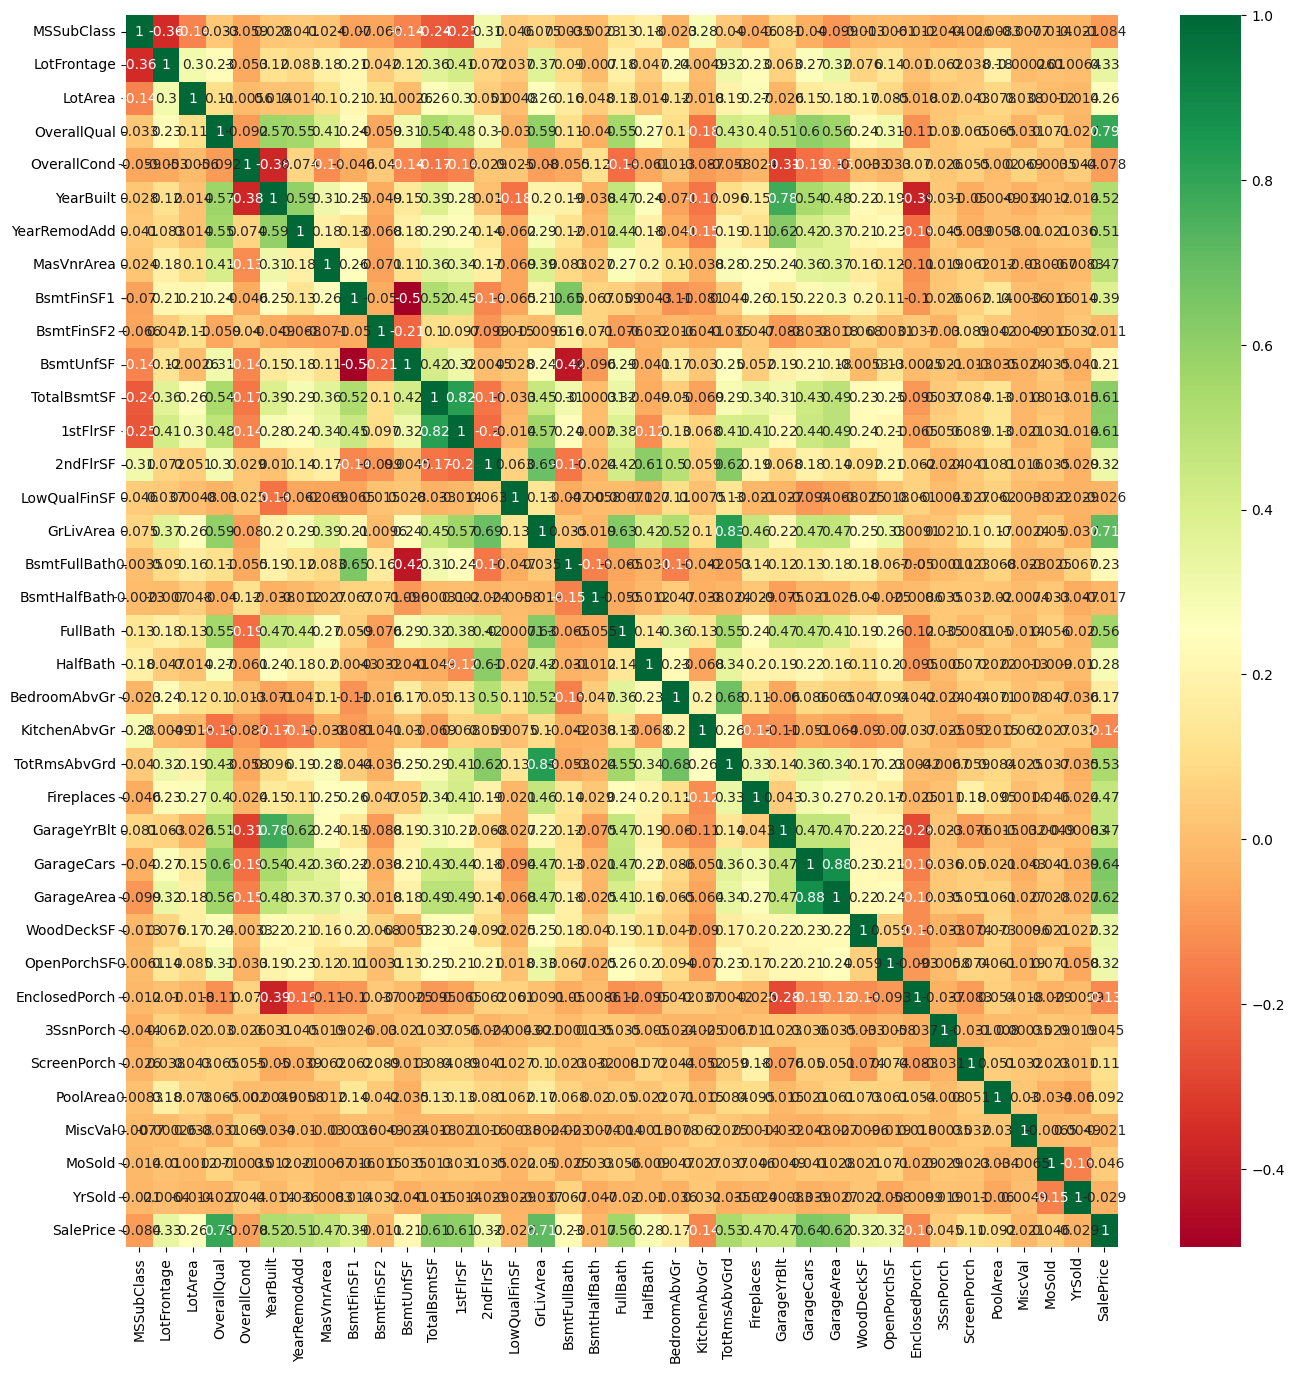

In [ ]:
# Obtén el número de columnas y filas de la matriz de correlación
num_columns = df_features.corr().shape[1]
num_rows = df_features.corr().shape[0]

# Establece un tamaño base para cada celda del heatmap
cell_size_width = 1.0  # ancho por columna
cell_size_height = 0.5  # alto por fila

# Calcula el tamaño de la figura
fig_width = num_columns * cell_size_width
fig_height = num_rows * cell_size_height

# Asegúrate de que la figura no sea demasiado pequeña o grande
fig_width = max(min(fig_width, 16), 8)  # limita el ancho entre 8 y 16
fig_height = max(min(fig_height, 16), 8)  # limita el alto entre 8 y 16

# Ajusta el tamaño de la figura de matplotlib
plt.figure(figsize=(fig_width, fig_height))

# Crea el heatmap usando Seaborn
sns.heatmap(df_features.corr(), annot=True, cmap='RdYlGn') #,numeric_only=True)

# Muestra el gráfico
plt.show()

Estadistica descriptiva ampliada
* Primero, veamos las estadísticas descriptivas de las variables numéricas que generalmente están más relacionadas con el precio de venta, como OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, y 1stFlrSF.

In [ ]:
# Estadísticas para las columnas numéricas seleccionadas
selected_numerical_columns = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']
df_features[selected_numerical_columns].describe()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1515.463699,1.767123,472.980137,1057.429452,1162.626712
std,1.382997,525.480383,0.747315,213.804841,438.705324,386.587738
min,1.000000,334.000000,0.000000,0.000000,0.000000,334.000000
25%,5.000000,1129.500000,1.000000,334.500000,795.750000,882.000000
50%,6.000000,1464.000000,2.000000,480.000000,991.500000,1087.000000
75%,7.000000,1776.750000,2.000000,576.000000,1298.250000,1391.250000
max,10.000000,5642.000000,4.000000,1418.000000,6110.000000,4692.000000


* Para las variables categóricas, podríamos ver cómo se distribuyen respecto a SalePrice usando la mediana o la media del precio de venta por categoría:

In [ ]:
# Mediana del precio de venta para cada categoría en 'MSZoning'
df_features.groupby('MSZoning')['SalePrice'].median().sort_values(ascending=False)

MSZoning
FV         205950.0
RL         174000.0
RH         136500.0
RM         120500.0
C (all)     74700.0
Name: SalePrice, dtype: float64

Visualización de Correlaciones Detallada
* Para las correlaciones, concentremos nuestra atención en las más fuertes relacionadas con SalePrice:

<ipython-input-162-75b23d12f4b4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  saleprice_correlation = df_features.corr()['SalePrice'].sort_values(ascending=False)


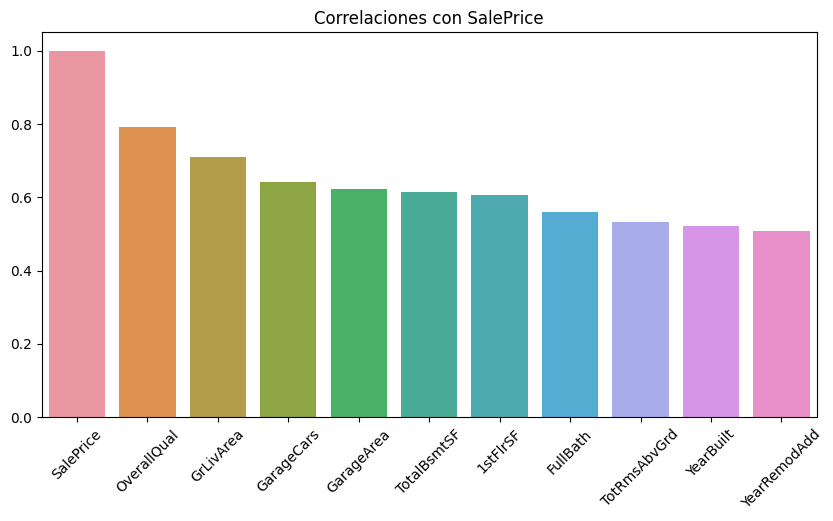

In [ ]:
# Correlaciones de 'SalePrice' con otras características
saleprice_correlation = df_features.corr()['SalePrice'].sort_values(ascending=False)
strong_correlations = saleprice_correlation[abs(saleprice_correlation) > 0.5]  # Asumiendo que queremos correlaciones fuertes
plt.figure(figsize=(10, 5))
sns.barplot(x=strong_correlations.index, y=strong_correlations.values)
plt.xticks(rotation=45)
plt.title('Correlaciones con SalePrice')
plt.show()

Gráficos de Dispersión y Boxplots Detallados
* Para los gráficos de dispersión, seleccionemos las variables numéricas con fuerte correlación y veamos cómo se relacionan individualmente con SalePrice.

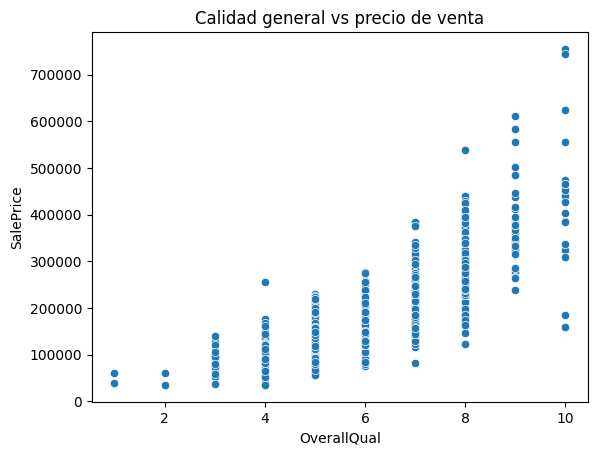

In [ ]:
# Gráfico de dispersión para 'OverallQual' vs 'SalePrice'
sns.scatterplot(x=df_features['OverallQual'], y=df_features['SalePrice'])
plt.title('Calidad general vs precio de venta')
plt.show()

Y para las variables categóricas que podrían tener un impacto en el precio de venta, como MSZoning:

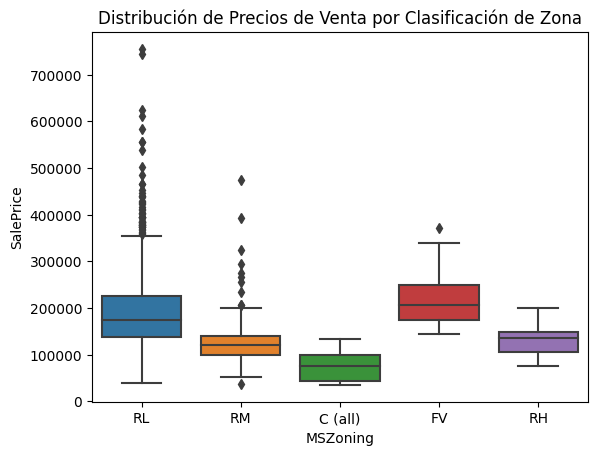

In [ ]:
# Boxplot para 'MSZoning' vs 'SalePrice'
sns.boxplot(x='MSZoning', y='SalePrice', data=df_features)
#plt.xticks(rotation=45)
plt.title('Distribución de Precios de Venta por Clasificación de Zona')
plt.show()

In [ ]:
df_features.describe(include=['object'])

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,2,4,4,2,5,3,25,9,8,...,4,7,6,7,4,6,6,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,TA,Typ,Desconocido,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1151,1454,925,1311,1459,1052,1382,225,1260,1445,...,735,1360,690,870,605,1311,1326,1340,1267,1198


In [ ]:
# Supongamos que df es el DataFrame de Pandas con tus datos
# Imputar con la media
imputer = SimpleImputer(strategy='mean')
df_filled = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Imputar con la mediana
imputer = SimpleImputer(strategy='median')
df_filled = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Imputar con la moda
imputer = SimpleImputer(strategy='most_frequent')
df_filled = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)